In [1]:
!pip install numpy pandas matplotlib seaborn plotly

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("covid_19_clean_complete.csv")

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.fillna(0, inplace=True)

In [6]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,0,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,0,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,0,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,0,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [7]:
df.shape

(49068, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  49068 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


# Line chart for daily new cases, deaths, and recoveries over time

C:\Users\KIIT\AppData\Local\Temp\ipykernel_22596\3365686820.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_series_data = df.groupby('Date').sum()


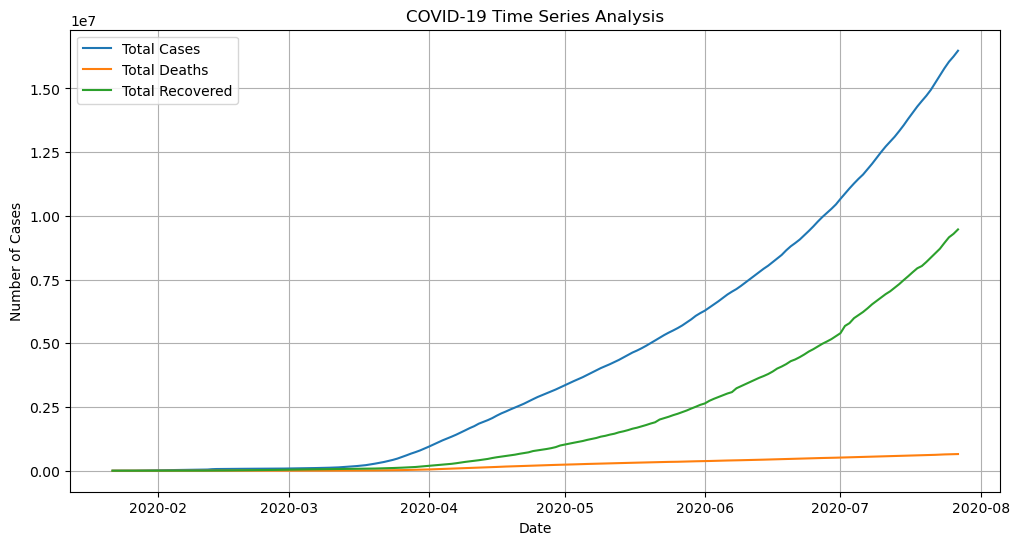

In [9]:
time_series_data = df.groupby('Date').sum()

plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data['Confirmed'], label='Total Cases')
plt.plot(time_series_data.index, time_series_data['Deaths'], label='Total Deaths')
plt.plot(time_series_data.index, time_series_data['Recovered'], label='Total Recovered')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Time Series Analysis')
plt.legend()
plt.grid(True)
plt.savefig('covid_time_series.png')
plt.show()

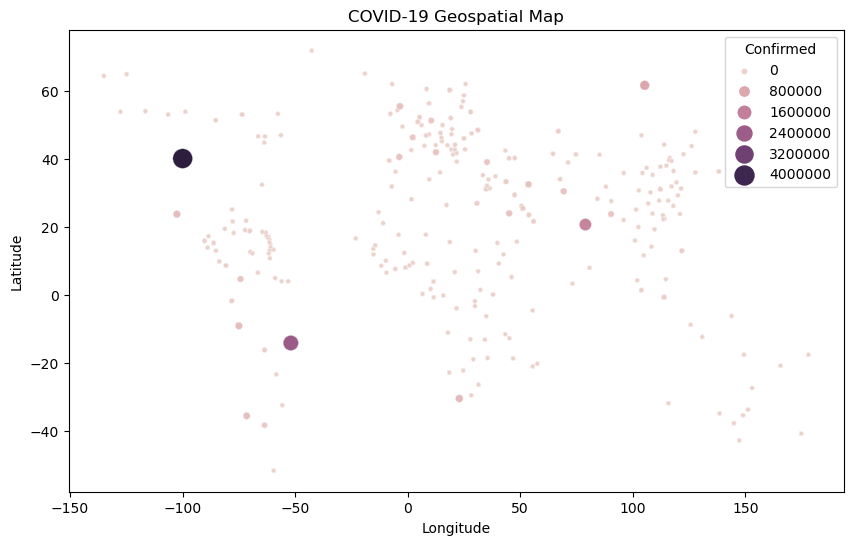

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Long', y='Lat', hue='Confirmed', size='Confirmed', sizes=(10, 200))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('COVID-19 Geospatial Map')
plt.savefig('covid_geospatial.png')
plt.show()

In [11]:
df1 = pd.read_csv("country_wise_latest.csv")

In [12]:
df1['Date'] = pd.to_datetime(df['Date'])
df1.fillna(0, inplace=True)

In [13]:
df1.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Date
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,2020-01-22
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,2020-01-22
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,2020-01-22
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,2020-01-22
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,2020-01-22


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Country/Region          187 non-null    object        
 1   Confirmed               187 non-null    int64         
 2   Deaths                  187 non-null    int64         
 3   Recovered               187 non-null    int64         
 4   Active                  187 non-null    int64         
 5   New cases               187 non-null    int64         
 6   New deaths              187 non-null    int64         
 7   New recovered           187 non-null    int64         
 8   Deaths / 100 Cases      187 non-null    float64       
 9   Recovered / 100 Cases   187 non-null    float64       
 10  Deaths / 100 Recovered  187 non-null    float64       
 11  Confirmed last week     187 non-null    int64         
 12  1 week change           187 non-null    int64     

In [15]:
df1.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region', 'Date'],
      dtype='object')

# Top 10 countries that has been given maximum number of covid cases

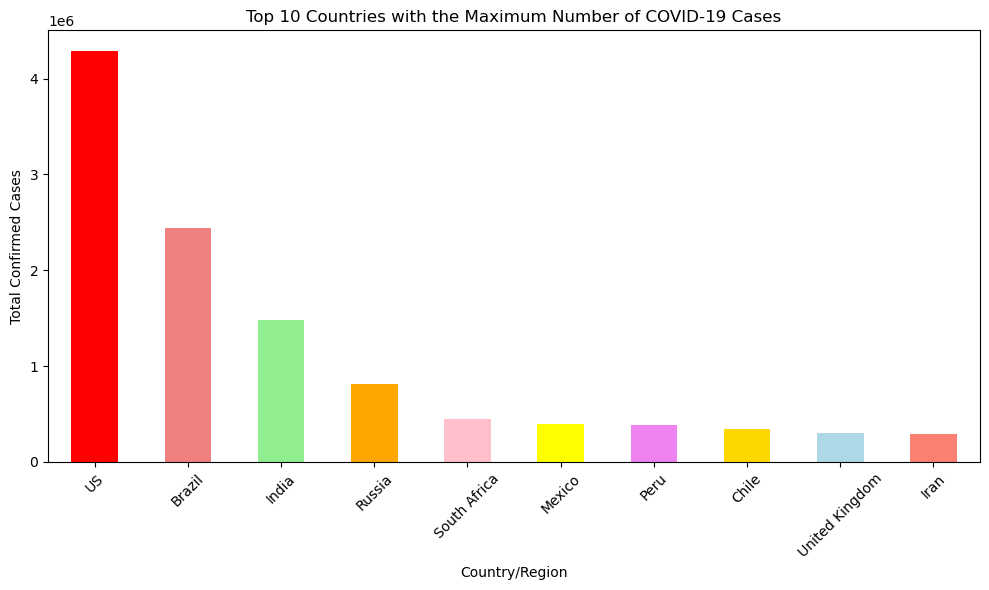

In [16]:
top_countries_confirmed = df1.groupby('Country/Region')['Confirmed'].max().nlargest(10)
colors = ['red', 'lightcoral', 'lightgreen', 'orange', 'pink', 'yellow', 'violet', 'gold', 'lightblue', 'salmon']
plt.figure(figsize=(10,6))
top_countries_confirmed.plot(kind='bar', color=colors)
plt.xlabel('Country/Region')
plt.xlabel("Country/Region")
plt.ylabel("Total Confirmed Cases")
plt.title("Top 10 Countries with the Maximum Number of COVID-19 Cases")
plt.xticks(rotation =45)
plt.tight_layout()
plt.savefig('covid_top_10.png')
plt.show()

# Top 10 Countries with the Maximum Number of COVID-19 Death Cases

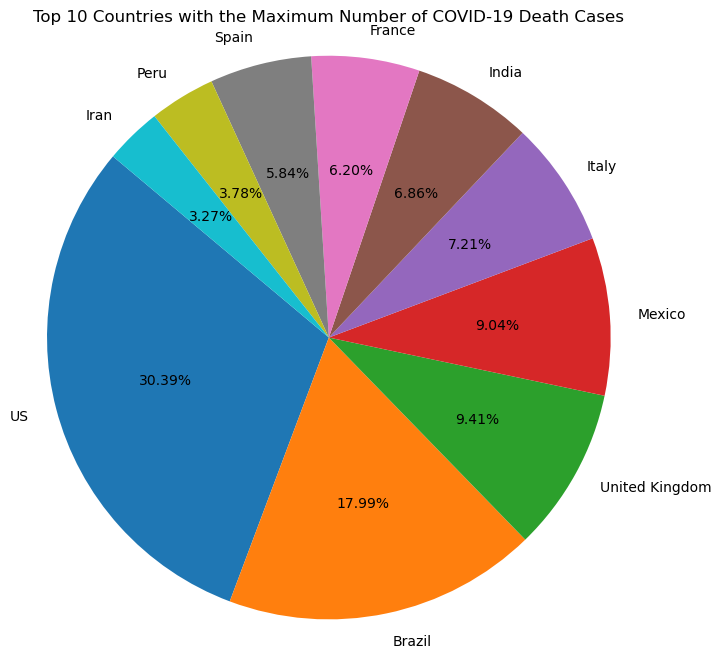

In [17]:
top_countries_death = df1.groupby("Country/Region")["Deaths"].max().nlargest(10)
plt.figure(figsize=(8,8))
pie_chart = plt.pie(top_countries_death,labels=top_countries_death.index,autopct ="%0.2f%%", startangle =140)
plt.title("Top 10 Countries with the Maximum Number of COVID-19 Death Cases")
plt.axis("equal")
plt.savefig('covid_top10_death.png')
plt.show()

# New Recovery Trend in the World

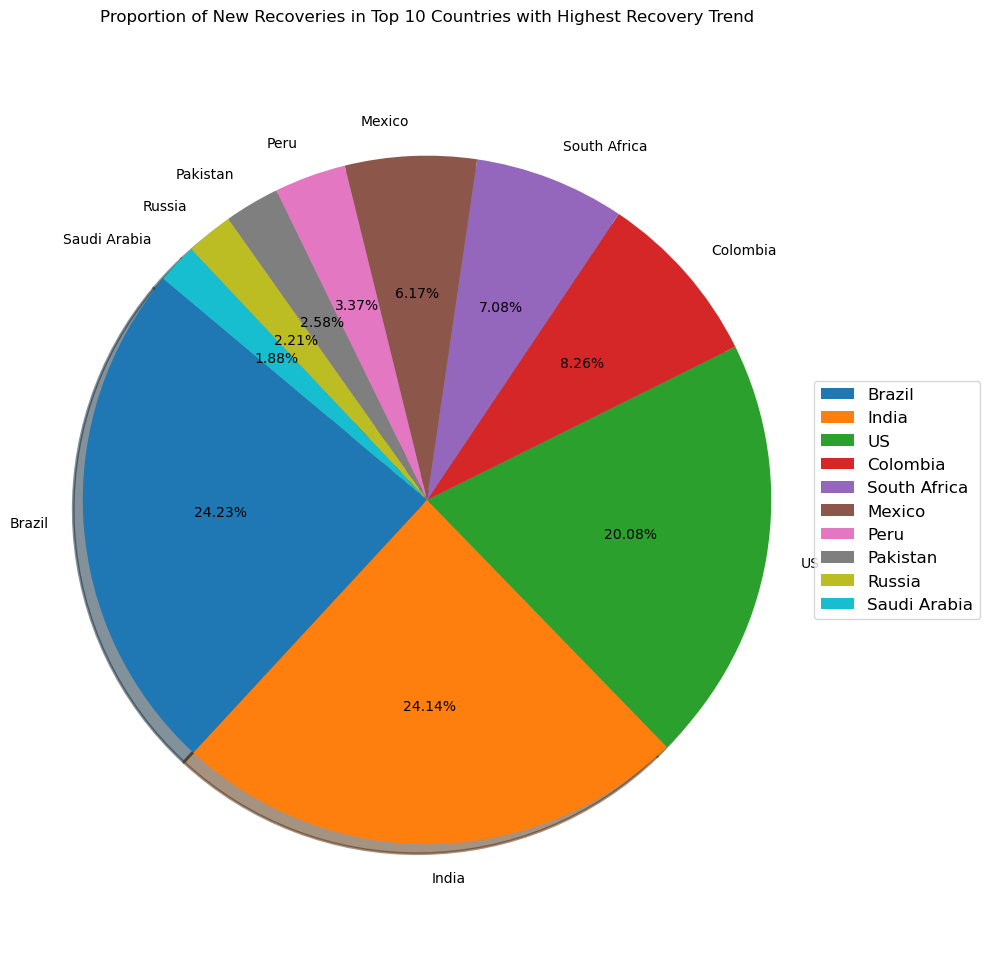

In [18]:

top_10_countries_recovery = df1.nlargest(10, "New recovered")

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(top_10_countries_recovery["New recovered"], labels=top_10_countries_recovery["Country/Region"], 
                                   autopct="%0.2f%%", shadow=True, startangle=140, wedgeprops={"linewidth": 2},
                                   textprops={'fontsize': 10})

plt.title("Proportion of New Recoveries in Top 10 Countries with Highest Recovery Trend")

# Set aspect ratio to be equal for better circular shape
plt.axis('equal')

# Move the legend outside the pie chart to avoid overlapping labels
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Adjust padding between the chart and text
plt.tight_layout()

plt.savefig('covid_recovery.png')

plt.show()


# country experiences the maximum frequency of recovery case

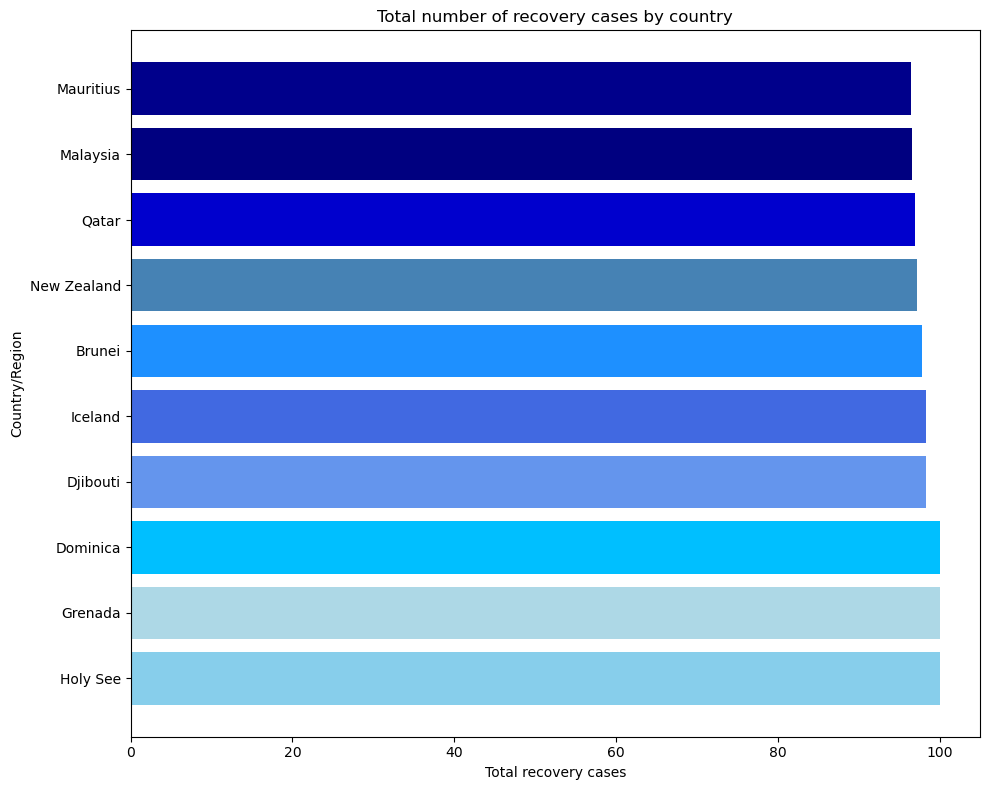

In [19]:
max_recovery_freq = df1.groupby("Country/Region")["Recovered / 100 Cases"].sum().reset_index()
max_recovery_freq = max_recovery_freq.sort_values(ascending = False, by ="Recovered / 100 Cases")
top_10_countries_recovery = max_recovery_freq.head(10)
colors = ['skyblue', 'lightblue', 'deepskyblue', 'cornflowerblue', 'royalblue', 
          'dodgerblue', 'steelblue', 'mediumblue', 'navy', 'darkblue']
plt.figure(figsize=(10,8))
plt.barh(top_10_countries_recovery["Country/Region"],top_10_countries_recovery["Recovered / 100 Cases"], color=colors)
plt.xlabel("Total recovery cases")
plt.ylabel("Country/Region")
plt.title("Total number of recovery cases by country")
plt.tight_layout()
plt.savefig('covid_recovery_country.png')
plt.show()

# Country Experiences the maximum frequency of death cases

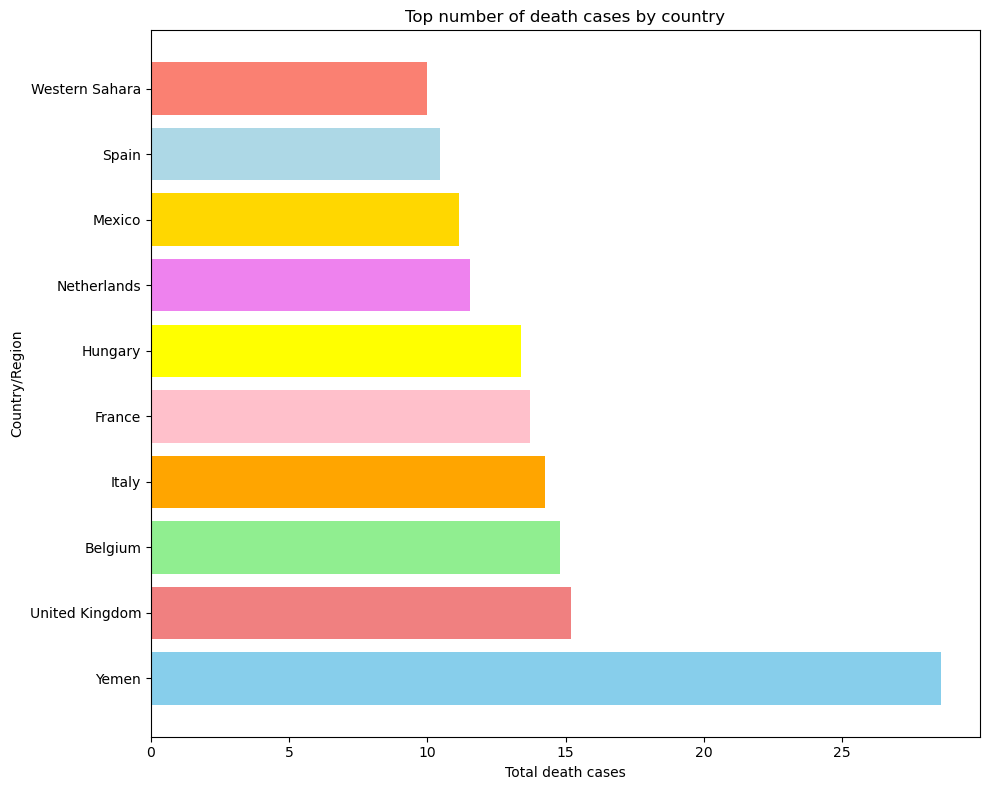

In [20]:
max_death_freq = df1.groupby("Country/Region")["Deaths / 100 Cases"].sum()
max_death_freq = max_death_freq.sort_values(ascending=False)

top_10_country_death = max_death_freq.head(10)

colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'pink', 'yellow', 'violet', 'gold', 'lightblue', 'salmon']

plt.figure(figsize=(10, 8))
bars = plt.barh(top_10_country_death.index, top_10_country_death, color=colors)

plt.xlabel("Total death cases")
plt.ylabel("Country/Region")
plt.title("Top number of death cases by country")
plt.tight_layout()
plt.savefig('covid_death_country.png')
plt.show()


# Correlation between confirmed,death and recovered cases

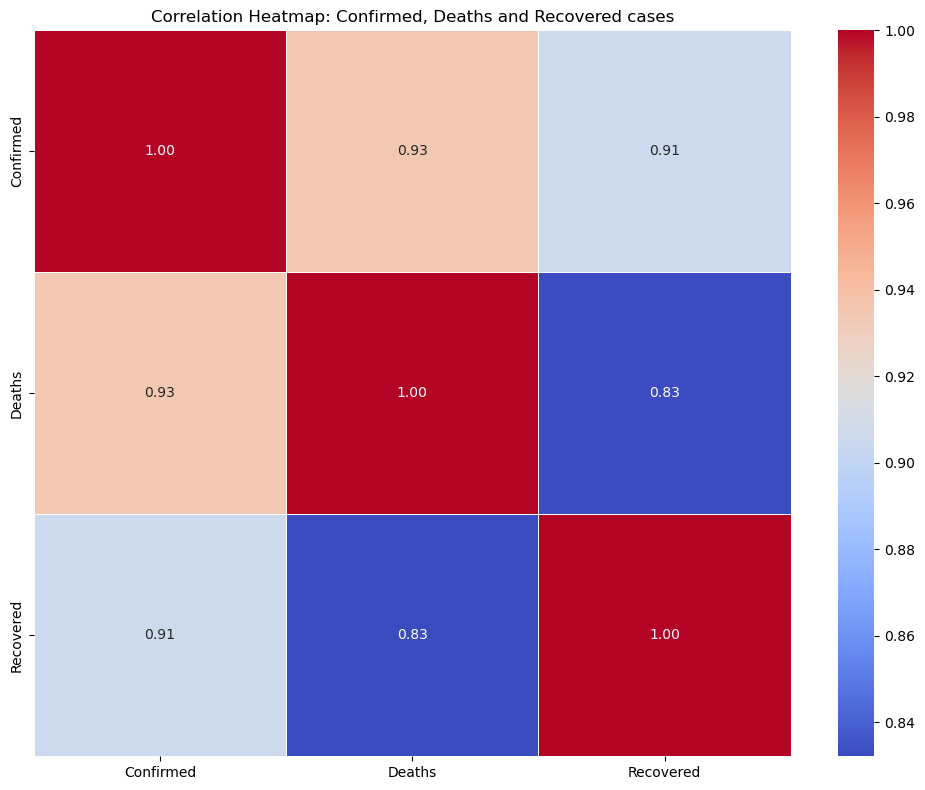

In [21]:
columns = ["Confirmed", "Deaths", "Recovered"]
cases_by_country = df1.groupby("Country/Region")[columns].sum()
correlation_matrix = cases_by_country.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True ,cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)
plt.title("Correlation Heatmap: Confirmed, Deaths and Recovered cases")
plt.tight_layout()
plt.savefig('covid_correlation.png')
plt.show()

In [22]:
df2 = pd.read_csv("day_wise.csv")

In [23]:
missing_values = df.isnull().sum()
print(missing_values)

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64


In [24]:
df2.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


In [26]:
df2.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

In [27]:
df2 ["Date"] = pd.to_datetime(df2["Date"])
df2 ["Year"] = pd.DatetimeIndex(df2["Date"]).year
df2 ["month"] = pd.DatetimeIndex(df2["Date"]).month
df2 ["day"] = pd.DatetimeIndex(df2["Date"]).day
df2 = df2.drop ("Date", axis = 1)
df2.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,Year,month,day
0,555,17,28,510,0,0,0,3.06,5.05,60.71,6,2020,1,22
1,654,18,30,606,99,1,2,2.75,4.59,60.00,8,2020,1,23
2,941,26,36,879,287,8,6,2.76,3.83,72.22,9,2020,1,24
3,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11,2020,1,25
4,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13,2020,1,26


In [28]:
feb_month = df2[df2["month"] == 2]
feb_month

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,Year,month,day
10,12038,259,281,11498,2111,46,62,2.15,2.33,92.17,25,2020,2,1
11,16787,362,459,15966,4749,103,178,2.16,2.73,78.87,25,2020,2,2
12,19887,426,604,18857,3100,64,145,2.14,3.04,70.53,25,2020,2,3
13,23898,492,821,22585,4011,66,217,2.06,3.44,59.93,26,2020,2,4
14,27643,564,1071,26008,3745,72,250,2.04,3.87,52.66,26,2020,2,5
15,30802,634,1418,28750,3159,70,347,2.06,4.60,44.71,26,2020,2,6
16,34334,719,1903,31712,3532,85,485,2.09,5.54,37.78,26,2020,2,7
17,37068,806,2470,33792,2734,87,567,2.17,6.66,32.63,26,2020,2,8
18,40095,906,3057,36132,3027,100,587,2.26,7.62,29.64,26,2020,2,9
19,42633,1013,3714,37906,2538,107,657,2.38,8.71,27.28,26,2020,2,10


# Confirmed Cases Trend in February

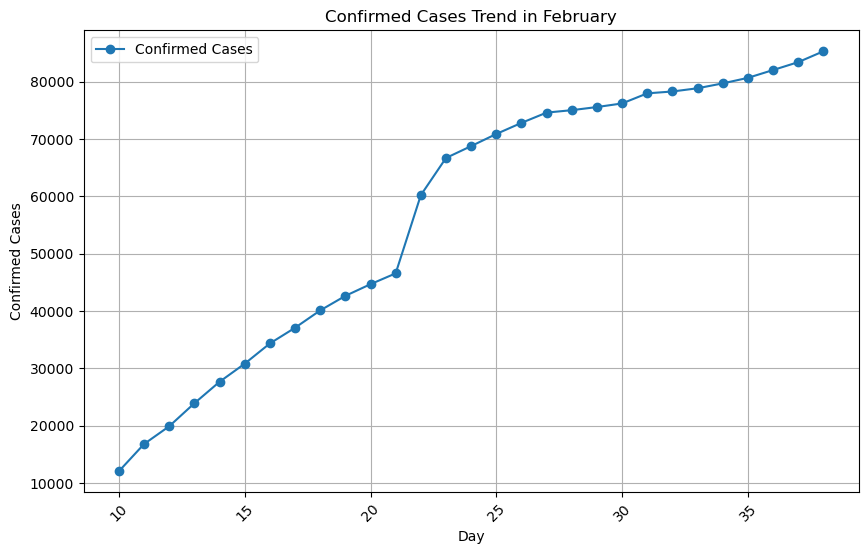

In [29]:
# january_data = df2.head(31) 
feb_data = feb_month
plt.figure(figsize=(10, 6))
plt.plot(feb_data.index, feb_data["Confirmed"], label="Confirmed Cases", marker="o")
plt.xlabel("Day")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases Trend in February")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.savefig('covid_jan_trend_confirmed.png')
plt.show()


# Deaths trend in February

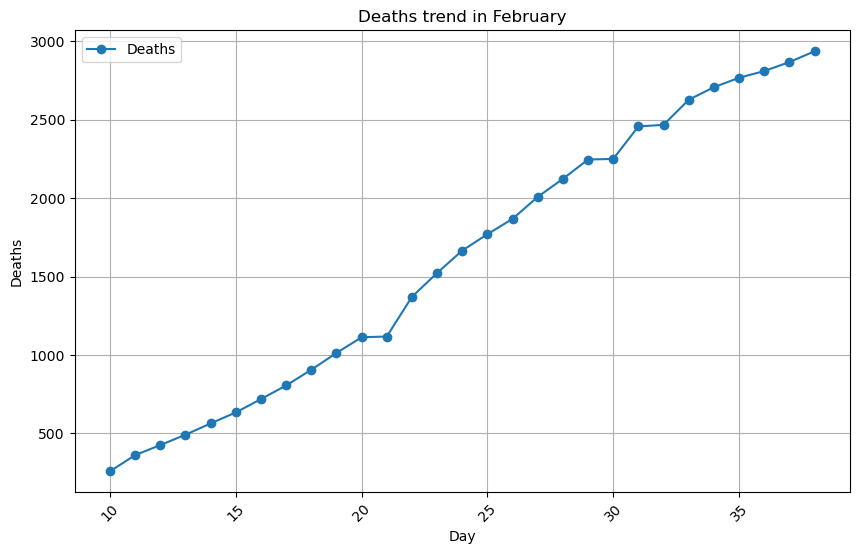

In [30]:
feb_data = feb_month

plt.figure(figsize=(10,6))
plt.plot(feb_data.index, feb_data["Deaths"], label = "Deaths", marker = "o")
plt.xlabel("Day")
plt.ylabel("Deaths")
plt.title("Deaths trend in February")
plt.legend()
plt.xticks(rotation = 45)
plt.grid()
plt.savefig('covid_jan_trend_death.png')
plt.show()

# Recovered cases trends in February

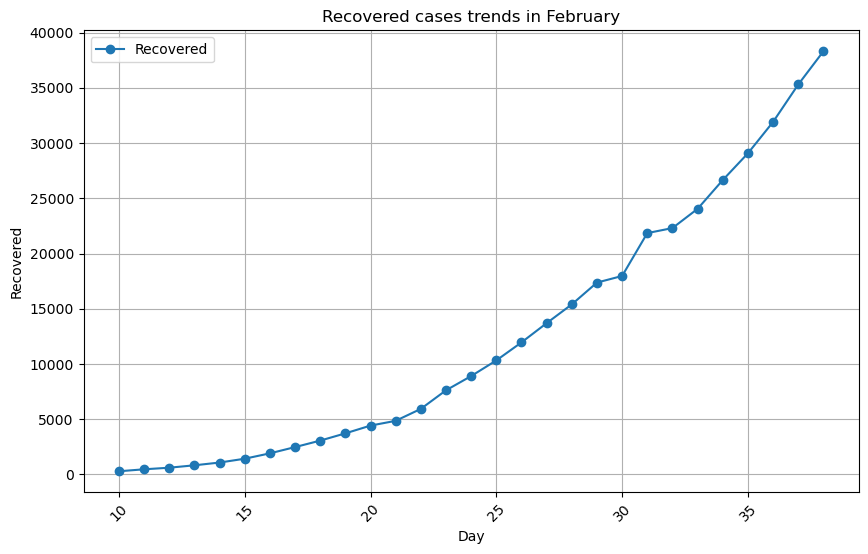

In [31]:
feb_data = feb_month

plt.figure(figsize=(10,6))
plt.plot(feb_data.index, feb_data["Recovered"], label = "Recovered", marker ="o")
plt.xlabel("Day")
plt.ylabel("Recovered")
plt.title("Recovered cases trends in February")
plt.legend()
plt.xticks(rotation = 45)
plt.grid()
plt.savefig('covid_jan_trend_recovery.png')
plt.show()

In [32]:
df3 = pd.read_csv("full_grouped.csv")

In [33]:
df3.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


# COVID-19 Statistics comparison:Top 10 Countries

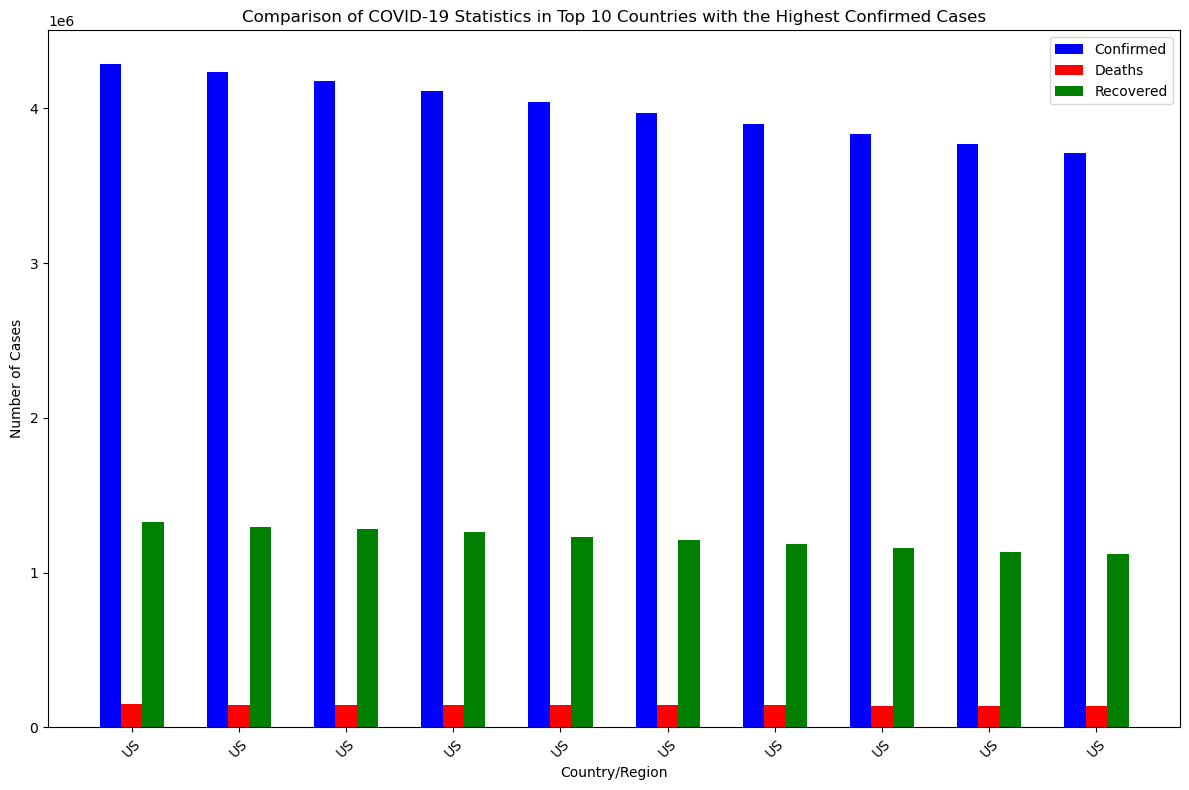

In [35]:

# Let's assume you want to compare the top 10 countries with the highest confirmed cases
top_countries_confirmed = df3.nlargest(10, 'Confirmed')

plt.figure(figsize=(12, 8))
bar_width = 0.2
bar_positions = range(len(top_countries_confirmed))

plt.bar(bar_positions, top_countries_confirmed['Confirmed'], label='Confirmed', color='blue', width=bar_width)
plt.bar([pos + bar_width for pos in bar_positions], top_countries_confirmed['Deaths'], label='Deaths', color='red', width=bar_width)
plt.bar([pos + 2 * bar_width for pos in bar_positions], top_countries_confirmed['Recovered'], label='Recovered', color='green', width=bar_width)

plt.xlabel('Country/Region')
plt.ylabel('Number of Cases')
plt.title('Comparison of COVID-19 Statistics in Top 10 Countries with the Highest Confirmed Cases')
plt.xticks([pos + bar_width for pos in bar_positions], top_countries_confirmed['Country/Region'], rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('covid_country_confirmed.png')
plt.show()


In [36]:
df5 = pd.read_csv("worldometer_data.csv")
df5.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [37]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [38]:
df5.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [39]:
df5 = df5.drop(['NewCases' , 'NewDeaths' , 'NewRecovered'] , axis = 1)

In [40]:
df5.head()

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [41]:
data = df5[['Country/Region' , 'ActiveCases' ,'TotalCases' ,'TotalDeaths','TotalRecovered','Tot Cases/1M pop' , 'Deaths/1M pop' , 'TotalTests' ,'Deaths/1M pop','Tests/1M pop']]
data.head()

,Country/Region,ActiveCases,TotalCases,TotalDeaths,TotalRecovered,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Deaths/1M pop,Tests/1M pop
0,USA,2292707.0,5032179,162804.0,2576668.0,15194.0,492.0,63139605.0,492.0,190640.0
1,Brazil,771258.0,2917562,98644.0,2047660.0,13716.0,464.0,13206188.0,464.0,62085.0
2,India,606387.0,2025409,41638.0,1377384.0,1466.0,30.0,22149351.0,30.0,16035.0
3,Russia,180931.0,871894,14606.0,676357.0,5974.0,100.0,29716907.0,100.0,203623.0
4,South Africa,141264.0,538184,9604.0,387316.0,9063.0,162.0,3149807.0,162.0,53044.0


In [42]:
import plotly.express as px

In [45]:
active_cases_column = 'ActiveCases'
df_sorted = df5.sort_values(by=active_cases_column, ascending=False)

top_n = 20
top_countries = df_sorted.head(top_n)

fig = px.treemap(top_countries, path=['Country/Region'], values=active_cases_column, 
                 title='Top Countries with Highest Active Cases',
                 color=active_cases_column,
                 color_continuous_scale='viridis', 
                 hover_data=['TotalCases', 'TotalDeaths', 'TotalRecovered'],
                 labels={active_cases_column: 'Active Cases'},
                 width=800, height=600)

plt.savefig('covid_active.png')


fig.show()


<Figure size 640x480 with 0 Axes>

In [44]:
top_10_countries = data.nlargest(10, 'TotalTests')

fig = px.scatter(top_10_countries, x='TotalTests', y='Tests/1M pop',
                 size='TotalTests', color='Tests/1M pop',
                 hover_name='Country/Region', text='Country/Region', 
                 size_max=50,
                 labels={'TotalTests': 'Total Tests', 'Tests/1M pop': 'Tests per 1M Population'},
                 title='Top 10 Countries with the Highest Total Tests',
                 width=800, height=600)
plt.savefig('covid_test.png')
fig.show()


<Figure size 640x480 with 0 Axes>